Observations and Insights:

# Toolkit and File Setup

In [83]:
# Import Dependencies and Modules
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st


# Load Files
mouse_metadata_path = "/Users/brianroberts1/Documents/GitHub/matplotlib_challenge/Mouse_metadata.csv"
study_results_path = "/Users/brianroberts1/Documents/GitHub/matplotlib_challenge/Study_results.csv"

# Read the Mouse Data and Study Results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_and_study = pd.merge(mouse_metadata, study_results,on = ["Mouse ID"])

# Display the data table for preview
mouse_and_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


# Data Cleaning

In [50]:
# Checking the number of mice for duplicates. 

# Based on the study_results, each mouse should have 10 entries,...
# ... any more should be considered a recording error and removed.  
mouse_and_study['Mouse ID'].value_counts().head()


g989    13
v991    10
y793    10
a262    10
c758    10
Name: Mouse ID, dtype: int64

In [84]:
### Remove data for Mouse ID: g989, as it has more than 10 entries ###

# Filter the rows that contain 'g989' and store the indexes
drop_ids = mouse_and_study[mouse_and_study['Mouse ID'] == 'g989'].index

# Delete matching row indexes from the dataframe
mouse_and_study.drop(drop_ids, inplace = True)

# Check cleaned dataframe
mouse_and_study['Mouse ID'].value_counts().head()


# As you can see below, 'g989' was successfully removed from the dataset. 

v991    10
y163    10
m650    10
j984    10
k403    10
Name: Mouse ID, dtype: int64

# Summary Statistics

In [85]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
#--------------------------------------------------------------------------------------------------------

# Calculate and Group the mean of tumor growth for each drug regimen.
tumor_means = mouse_and_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()

# Calculate and Group the median of tumor growth for each drug regimen.
tumor_medians = mouse_and_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()

# Calculate and Group the variance of tumor growth for each drug regimen.
tumor_vars = mouse_and_study.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()

# Calculate and Group the standard deviation of tumor growth for each drug regimen.
tumor_stds = mouse_and_study.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()

# Calculate and Group the SEM of tumor growth for each drug regimen.
tumor_sems = mouse_and_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()


# Assemble the resulting series into a single summary dataframe.
#---------------------------------------------------------------
tumor_summary = pd.DataFrame({"Mean":tumor_means, "Median":tumor_medians, "Variance":tumor_vars, 
                              "Standard Deviation":tumor_stds, "SEM":tumor_sems})
tumor_summary

# Using the aggregation method, produce the same summary statistics in a single line ????


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar and Pie Charts

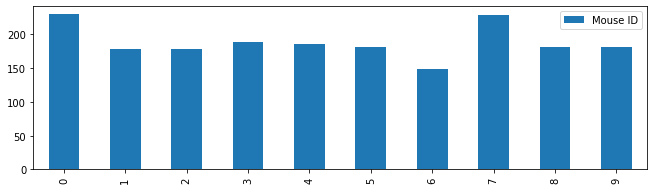

In [100]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.(DataFrame.plot())

group_drugs = pd.DataFrame(mouse_and_study.groupby(['Drug Regimen']).count()).reset_index()
#mice_drugs = group_drugs[['Drug Regimen','Mouse ID']]
#mice_drugs.plot(kind='bar',figsize=(11,3))




In [ ]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
# pyplot


In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


# Quartiles, Outliers, and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


# Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


# Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
